In [1]:
import tensorflow as tf

2022-09-29 01:10:50.642631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/georgreen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os

## Remove Dodgy Images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('e-waste')

Found 1218 files belonging to 2 classes.


2022-09-29 01:10:59.828459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

2022-09-29 01:11:00.153948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:01.418494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


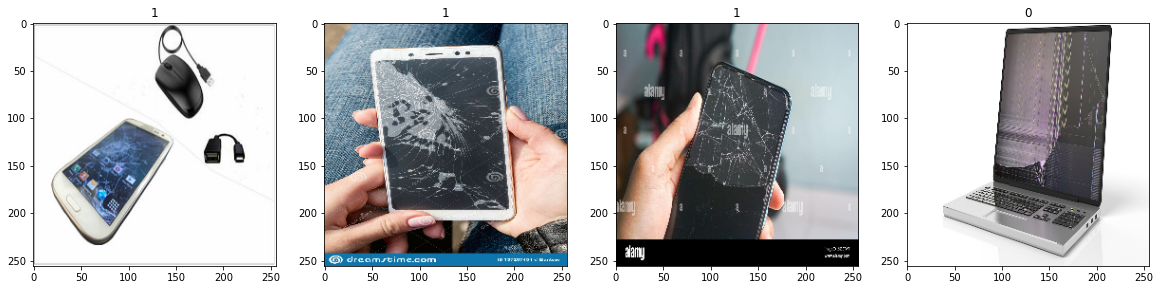

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

2022-09-29 01:11:02.855823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:03.994066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[9.4151348e-01, 9.3759191e-01, 9.6896446e-01],
          [9.4509804e-01, 9.4117647e-01, 9.7254902e-01],
          [9.4678307e-01, 9.4286150e-01, 9.7423404e-01],
          ...,
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01],
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01],
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01]],
 
         [[9.4151348e-01, 9.3759191e-01, 9.6896446e-01],
          [9.4509804e-01, 9.4117647e-01, 9.7254902e-01],
          [9.4678307e-01, 9.4286150e-01, 9.7423404e-01],
          ...,
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01],
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01],
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01]],
 
         [[9.4151348e-01, 9.3759191e-01, 9.6896446e-01],
          [9.4509804e-01, 9.4117647e-01, 9.7254902e-01],
          [9.4678307e-01, 9.4286150e-01, 9.7423404e-01],
          ...,
          [8.9803922e-01, 8.8627452e-01, 9.2156863e-01],
          [8.9803922e-01, 8.8627452e-

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

27

In [16]:
val_size

7

In [17]:
test_size

3

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-09-29 01:11:05.763618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:06.944836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:07.782159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 1.1452 - accuracy: 0.5437

2022-09-29 01:11:12.382575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.5648

2022-09-29 01:11:31.163776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:32.549136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:33.228397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:35.295940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 36s 1s/step - loss: 0.7609 - accuracy: 0.5648 - val_loss: 0.6442 - val_accuracy: 0.5759
Epoch 2/20


2022-09-29 01:11:41.091679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:42.206717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:11:43.004766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/27 [=====>........................] - ETA: 18s - loss: 0.6023 - accuracy: 0.6302

2022-09-29 01:11:48.153817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.6140 - accuracy: 0.6493

2022-09-29 01:12:04.853776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:05.992978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:06.665717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:08.715042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.6140 - accuracy: 0.6493 - val_loss: 0.6029 - val_accuracy: 0.6875
Epoch 3/20


2022-09-29 01:12:14.319620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:15.432715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:16.255341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.5690 - accuracy: 0.7063

2022-09-29 01:12:20.432390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.7222

2022-09-29 01:12:38.040520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:39.217276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:39.877489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:41.929890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.5419 - accuracy: 0.7222 - val_loss: 0.4966 - val_accuracy: 0.7679
Epoch 4/20


2022-09-29 01:12:47.586818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:48.695184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:12:49.518661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 0.4408 - accuracy: 0.8625

2022-09-29 01:12:53.752625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.4797 - accuracy: 0.7650

2022-09-29 01:13:12.107165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:13.225509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:13.938507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:16.069539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.4797 - accuracy: 0.7650 - val_loss: 0.5789 - val_accuracy: 0.6786
Epoch 5/20


2022-09-29 01:13:21.807130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:23.013665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:23.931134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 22s - loss: 0.4538 - accuracy: 0.7563

2022-09-29 01:13:28.959073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.7928

2022-09-29 01:13:46.464236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:47.573720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:48.245165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:50.307185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.4169 - accuracy: 0.7928 - val_loss: 0.5052 - val_accuracy: 0.7366
Epoch 6/20


2022-09-29 01:13:56.062149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:57.186751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:13:57.959644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.3133 - accuracy: 0.8750

2022-09-29 01:14:02.071509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8588

2022-09-29 01:14:19.201039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:20.308210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:20.987061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:23.093817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.3295 - accuracy: 0.8588 - val_loss: 0.5391 - val_accuracy: 0.7545
Epoch 7/20


2022-09-29 01:14:29.105398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:30.217763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:30.983102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.2578 - accuracy: 0.9000

2022-09-29 01:14:35.157934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9028

2022-09-29 01:14:52.101834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:53.401880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:54.087460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:14:56.137517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.2517 - accuracy: 0.9028 - val_loss: 0.3802 - val_accuracy: 0.8527
Epoch 8/20


2022-09-29 01:15:01.935903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:03.047006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:03.849893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.1494 - accuracy: 0.9625

2022-09-29 01:15:08.031322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.1796 - accuracy: 0.9410

2022-09-29 01:15:25.423100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:26.789216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:27.638168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:29.717798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.1796 - accuracy: 0.9410 - val_loss: 0.3220 - val_accuracy: 0.8482
Epoch 9/20


2022-09-29 01:15:35.530154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:36.712480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:15:37.611207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 22s - loss: 0.1144 - accuracy: 0.9688

2022-09-29 01:15:42.663803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9595

2022-09-29 01:16:00.249668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:01.539081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:02.215866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:04.310551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 35s 1s/step - loss: 0.1411 - accuracy: 0.9595 - val_loss: 0.4537 - val_accuracy: 0.8795
Epoch 10/20


2022-09-29 01:16:10.522164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:11.723289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:12.583961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0742 - accuracy: 0.9750

2022-09-29 01:16:16.702789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0997 - accuracy: 0.9699

2022-09-29 01:16:33.895240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:35.014737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:35.674094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:37.729165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.5726 - val_accuracy: 0.8571
Epoch 11/20


2022-09-29 01:16:43.478884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:44.573002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:16:45.367003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0467 - accuracy: 0.9937

2022-09-29 01:16:49.453341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9850

2022-09-29 01:17:07.215956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:08.440781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:09.162606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:11.428858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.0578 - accuracy: 0.9850 - val_loss: 0.4063 - val_accuracy: 0.9018
Epoch 12/20


2022-09-29 01:17:17.514229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:18.636953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:19.420359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 0.0336 - accuracy: 0.9937

2022-09-29 01:17:23.905781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9838

2022-09-29 01:17:40.989394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:42.188021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:42.873394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:44.887984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.0604 - accuracy: 0.9838 - val_loss: 0.3957 - val_accuracy: 0.8884
Epoch 13/20


2022-09-29 01:17:50.536645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:51.637510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:17:52.432087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 0.0410 - accuracy: 1.0000

2022-09-29 01:17:56.786616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9931

2022-09-29 01:18:14.790611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:15.940065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:16.615914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:18.640124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.0395 - accuracy: 0.9931 - val_loss: 0.3283 - val_accuracy: 0.9018
Epoch 14/20


2022-09-29 01:18:24.313482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:25.420501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:26.175780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0097 - accuracy: 1.0000

2022-09-29 01:18:30.374360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9988

2022-09-29 01:18:48.293947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:49.562329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:50.452438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:52.481119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.0164 - accuracy: 0.9988 - val_loss: 0.3315 - val_accuracy: 0.9152
Epoch 15/20


2022-09-29 01:18:58.236767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:18:59.357548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:00.165015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 0.0090 - accuracy: 1.0000

2022-09-29 01:19:04.501757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9954

2022-09-29 01:19:23.204995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:24.461598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:25.171311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:27.224860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 35s 1s/step - loss: 0.0230 - accuracy: 0.9954 - val_loss: 0.6121 - val_accuracy: 0.8750
Epoch 16/20


2022-09-29 01:19:33.046614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:34.177449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:35.065766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0469 - accuracy: 0.9875

2022-09-29 01:19:39.210552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9907

2022-09-29 01:19:56.849056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:58.026418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:19:58.691971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:00.728455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.3141 - val_accuracy: 0.9330
Epoch 17/20


2022-09-29 01:20:06.511636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:07.612003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:08.414949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 19s - loss: 0.0055 - accuracy: 1.0000

2022-09-29 01:20:12.615954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9988

2022-09-29 01:20:30.373420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:31.547770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:32.213939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:34.248659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 33s 1s/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.4574 - val_accuracy: 0.9241
Epoch 18/20


2022-09-29 01:20:39.873092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:40.995195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:20:41.835640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0019 - accuracy: 1.0000

2022-09-29 01:20:45.943808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9977

2022-09-29 01:21:04.767576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:05.985942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:06.670307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:08.828552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 35s 1s/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.6581 - val_accuracy: 0.8973
Epoch 19/20


2022-09-29 01:21:14.594861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:15.762681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:16.583424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0081 - accuracy: 1.0000

2022-09-29 01:21:20.869246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000

2022-09-29 01:21:38.808319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:40.022147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:40.694996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:42.733538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 34s 1s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.6233 - val_accuracy: 0.9062
Epoch 20/20


2022-09-29 01:21:48.443021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:49.544803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:21:50.294678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/27 [====>.........................] - ETA: 18s - loss: 0.0015 - accuracy: 1.0000

2022-09-29 01:21:54.559599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9977

2022-09-29 01:22:13.167486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:14.324655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:15.010875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:17.071632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/27 [==============================] - 35s 1s/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.5648 - val_accuracy: 0.9196


## 8. Plot Performance

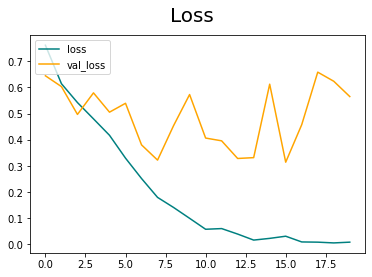

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

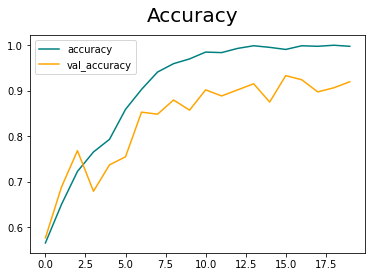

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2022-09-29 01:22:23.275840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:24.379461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:25.063780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-29 01:22:27.105837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 189ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8703704, shape=(), dtype=float32) tf.Tensor(0.94, shape=(), dtype=float32) tf.Tensor(0.8958333, shape=(), dtype=float32)


## 10. Test

In [34]:
import cv2

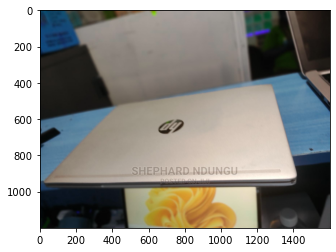

In [35]:
img = cv2.imread('/Users/georgreen/Circularity/e-waste/computer/computer_0.jpg')
plt.imshow(img)
plt.show()

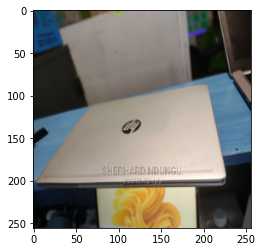

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


In [38]:
yhat

array([[1.8097084e-05]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Phone')
else:
    print(f'Predicted class is Computer')

Predicted class is Computer


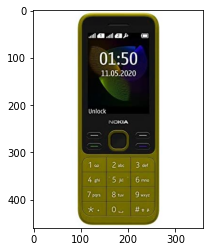

In [42]:
img = cv2.imread('/Users/georgreen/Circularity/e-waste/phone/phone_100.jpg')
plt.imshow(img)
plt.show()

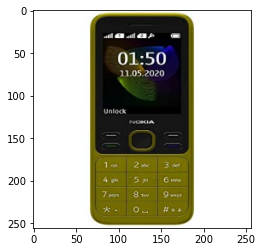

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [45]:
yhat

array([[1.]], dtype=float32)

In [46]:
if yhat > 0.5: 
    print(f'Predicted class is Phone')
else:
    print(f'Predicted class is Computer')

Predicted class is Phone
